## Selection sort

Find the smallest item in the list. Swap it into the 0 position 
Find the second smallest in the list, swap it into the 1 position
find the third smallest item in the list, swap it to the 2 position 
stop when we have swapped the second-largest item into the second to last position 

In [ ]:
def selection_sort(the_list):
    
    # depends on the len(the_list)
    for i in range(len(the_list) - 1):
        
        # c1 constant of times 
        
        minval = the_list[i]
        index_smallest = i
        
        # depends on the len(the_list) - 1 each time while i increase
        
        for j in range(i + 1, len(the_list)):
            if the_list[i] < minval:
                minval = the_list[j]
                index_smallest = j
        
        # c2 constant of times
        temp = the_list[i]
        the_list[i] = minval
        the_list[index_smallest] = temp 

        # n-1 + (n-1 + n-2 + n-3 + ... + 1) = (n+1) * (n/2) = n ^ 2/2 + n/2
        # drop the constant
        # run time is n^2 + n (when n gets really big, we don't care about the n)
        # worst case: O(n^2)
        # have to go through the nested for loop even in the best case

## Insertion sort


In [ ]:
def insertion_sort(the_list):
    n = len(the_list) # constant 
    
    # n - 1 times = n times 
    for i in range(1,n):
        key = the_list[i] # the element that slide / constant
        
        j = i - 1
        
        # worst case is a reverse order: (n-1), (n-2), (n-3),...,1 -> O(n^2)
        while j >= 0 and the_list[j] > key:
            the_list[j +1] = the_list[j]
            j -= 1
            
        the_list[j + 1] = key
        # best case never go through while loop, therefore runtime is O(n)

## Merge Sort

### Linear-time Merging
#### merge 2 sorted sublists

0 1 2 3 4
2 3 6 9 10
1 4 5 7 8



In [ ]:
def merge(the_list, p, q, r):
    left = the_list[p : (q + 1)]
    right = the_list[(q + 1) : (r + 1)]
    
    i = 0 
    j = 0
    k = p
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            the_list[k] = left[i]
            i += 1
        else:
            the_list[k] = right[j]
            j += 1
        
        k += 1
    if i < len(left):
        the_list[k : r + 1] = left[i:]
    
    if j < len(right):
        the_list[k : r + 1] = right[j:]

In [ ]:
def merge_sort(the_list, p=None, r= None): # recursively merge sort list
    if p == None and r == None:
        p = 0
        r = len(the_list) -1
    
    if p < r: # the base case is explicit  
        q = (p + r)/2
        merge_sort(the_list, p, q)
        merge_sort(the_list, q + 1, r)
        merge(the_list, p, q)
        # no return because we are modifying the list in run time 
        '''
        2(n/2)
        4(n/4)
        8(n/8)
        every level cost n time
        
        mer_sort run time: half of the list : log(n)
        merge run time: n
        total run time: O(nlog(n))
        '''

## Practice

In [ ]:
def permutation(L): # this recursive func generate permutation of a given list
    
    # 2 base case, empty list or only 1 element in the list
    if len(L) == 0:
        return []
    elif len(L) == 1:
        return[L]
    else:
        # build the list
        P = []
        # go through each element in the list
        for i in range(len(L)):
            # grab the first element
            first = L[i]
            # the rest of the list except the first element 
            rest = L[:i] + L[i + 1:]
            # got through the rest of the list
            for p in permutation (rest):
                P.append([first] + p)
        return P
P = permutation([7,3,9,1])
print(P)

In [ ]:
def search_sort(P):
    # go through the outter loop consists all the list
    for i in range(len(P)):
        find = True
        # go through element in each list 
        for j in range(len(P[i]) - 1):
            # checking the wrong order, if the previous element greater then the latter
            if (P[i][j] > P[i][j + 1]):
                find = False
                break
        if find:
            return P[i]

In [ ]:
search_sort(P)

## Pancake Sort

In [ ]:
'''
Implement pancake sort of a list A of length n, on the ith iteration:
    1. find the index, m, of the maximum element in the sublist A[0,n-i]
    2. reverse the list A[0,m] - this puts the maximum element in position 0
    3. reverse the list A[0,n-i] -- this puts the maximum element in position i
    
    A = [6,9,2,5]
    1. max element in A[0,3] is 9 at pos 1
        flip A[0,1] to yield A = [9,6,2,5]
        flip A[0,3] to yield A = [5,2,6,9]
    2. max element in A[0,2] is 6 at position 2
        flip A[0,2] to yield A = [6,2,5,9] 
        flip A[0,2] to yield A = [5,2,6,9]
    repeat
'''

def flip(A, i): # reverse list A[0...i]
    start = 0
    while start < i:
        temp = A[start]
        A[start] = A [i]
        A[i] = temp
        start += 1
        i -= 1
        
def findMax(A, n): # return index of maximum element in A[0...n-1]
    mi = 0
    for i in range(n):
        if A[i] > A[mi]:
            mi = i 
    return mi 

In [ ]:
def pancake_sort(A):
    n = len(A)
    while n > 1:
        index = findMax(A, n)
        flip(A, index)
        flip(A, n -1)
        n = n-1
        
A = [6,9,2,5]
pancake_sort(A)
print(A)

In [ ]:
A = [6,9,2,5]
n = len(A)

for i in range(n):
    print(i)
    index = findMax(A, n-i)
    print(index)
    flip(A, index)
    print(A)
    flip(A, (n - index))
    print(A)
    n = n - i

## Linked List

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
    
    def printList(self):
        cur = self
        while cur != None:
            print(cur.data, end= ' ')
            cur = cur.next
        print("")
        
    # insert a node after the current node    
    def insertAfter(self, node):
        temp = self.next # current next node
        self.next = node # set current next to new node
        node.next = temp # set new node's next to previous next 
        
    # insert a node at the end of the list
    def insertAtEnd(self, node):
        cur = self
        while(cur.next != None): # find the last node
            cur = cur.next
        cur.insertAfter(node) #insert node

In [ ]:
n = Node('1')
n.next = Node('2')
n.printList()

In [ ]:
head = Node('A')
head.insertAfter(Node('B'))
head.insertAfter(Node('C'))
head.insertAtEnd(n)

head.printList()

In [ ]:
# Implement the function stable, which takes a list of numbers s, 
# a positive integer k and n. Stable returns whether all pairs
# of values in s with indices that differ by at most k have an 
# absolute difference in value of at most n.
#
# stable([1, 2, 3, 5, 6], 1, 2)  # adjacent values differ by at most 2
# True
#
# stable([1, 2, 3, 5, 6], 2, 2)  # abs(5-2) is a difference of 3
# False
#
# stable([1, 5, 1, 5, 1], 2, 2)  # abs(5-1) is a difference of 4
# False
#
# stable([5, 4, 3, 2, 1], 1, 1)  # adjacent values differ by at most 1
# True


In [ ]:
def stable(s, k, n):
    for i in range(len(s) - k):
        for j in range (i + 1, i + k + 1):
            if (abs(s[i] - s[j]) > n):
                return False
    return True

In [ ]:
s = [1, 2, 3, 5, 6]
k = 1
n = 2

print(stable(s, k, n))


In [ ]:
# Write a function that takes as input an SLL and returns True if the 
# elements in the list are in sorted order, and False otherwise.

In [ ]:
class Node:
    def __init__(self,data):
        self.data = data
        self.next = None

head = Node(2)                   # 2
head.next = Node(3)              # 2 --> 3
head.next.next = Node(8)         # 2 --> 3 --> 8
head.next.next.next = Node(10)   # 2 --> 3 --> 8 --> 10

In [ ]:
head1 = Node(5)                   # 2
head1.next = Node(3)              # 2 --> 3
head1.next.next = Node(8)         # 2 --> 3 --> 8
head1.next.next.next = Node(10)   # 2 --> 3 --> 8 --> 10

In [ ]:
def sortNode(l):
    #n = l
    while l.next != None:
        #print(l.data)
        if (l.data > l.next.data):
            return False
        
            l = l.next
        return True

In [ ]:
sortNode(head)

In [ ]:
sortNode(head1)

### DDL

In [ ]:
# write a member function of the class Node that returns true if the node is the last element in the list and false otherwise

In [ ]:
class Node:
    def __init__(self,data):
        self.data = data
        self.next = None
        
    def printList(self):
        cur = self
        while cur != None:
            print(cur.data, end= ' ')
            cur = cur.next
        print("")
        
    def is_last(self):
         return self.next == None
    

In [ ]:
head = Node(2) 
head.next = Node(3)              
head.next.next = Node(8)         
#head.next.next.next = Node(10)

In [ ]:
head.is_last()

In [ ]:
head.printList()

In [ ]:
# write a function that takes as input the head of an SLL
# and returns the length of the SLL

def how_long(Node):

    if Node.data == None:
        return 0
    
    counter = 1
    
    #while Node.is_last() != True:
    while Node.next != None:
        counter += 1
        Node = Node.next
    
    return counter

In [ ]:
x = how_long(head)
print(x)

In [ ]:
none = Node(None)
y = how_long(none)
print(y)

In [ ]:
# write a member function of the class Node that deletes
# a node's next node. For example, for the list  2-3-8-10 
# calling deleteNextNode from node 2, will delete node 3
# yielding the list 2-8-10. 

class Node:
    def __init__(self,data):
        self.data = data
        self.next = None
        
    def printList(self):
        cur = self
        while cur != None:
            print(cur.data, end= ' ')
            cur = cur.next
        print("")
    '''
    def delete_next(self):
        if self.next == None:
            return None
        else:
            self.next == self.next.next
    '''
            
    def deleteNextNode(self):
        if (self.next != None ):
            self.next = self.next.next


In [ ]:
head = Node(2) 
head.next = Node(3)              
head.next.next = Node(8)         
#head.next.next.next = Node(10)

In [ ]:
def printSLL(head):
    temp = head
    while( temp != None ):
        print( temp.data, end=" --> ")
        temp = temp.next
    print("/")

In [ ]:
head.printList()

In [ ]:
head.delete_next()

In [ ]:
printSLL(head)

In [ ]:
head.next.next.deleteNextNode()

In [ ]:
printSLL(head)

### Tree Graph

In [ ]:
import easygraph as eg
import drawSvg as draw 

In [ ]:
pip install Python-EasyGraph

In [ ]:
G = eg.Graph()
G.add_edges([(2, 3), (1, 3), (1, 2), (1, 4), (3, 4), (4, 5), (6, 5), (6, 1)]) # add edges
coords = eg.functions.drawing.circular_position(G)
print(coords)



In [ ]:
# Notice that nodes' coordinates are scaled between [-1,1]. In order 
# to render them in pixel units scale the coordinates within coords to 
# be between [-100 100] aka.times 100

s = 100
for k in coords.keys():
    coords[k] = s * coords[k]
    
print(coords)

In [ ]:
D = draw.Drawing(250,250, origin='center')

for v in coords.values():
    print(v[0], ",", v[1])
    D.append( draw.Circle(v[0],v[1],15) )
D


In [ ]:
print(G.edges)

In [ ]:
for i in range(len(G.edges)):
    x1 = G.edges[i][0]
    x2 = G.edges[i][1]

    y1 = coords[x1]
    y2 = coords[x2]
    

    D.append(draw.Line(y1[0],y1[1],y2[0],y2[1], stroke= 'black', stroke_width= 2, fill = 'none'))

for k,v in coords.items():
    D.append(draw.Text(str(k), 18, v[0], v[1], fill= "yellow",center = 0.6))
    
D

### CSV 

In [ ]:
with open('temperatures.csv') as csvfile:
    csvdata = csv.reader(csvfile)
    next(csvdata, None) #skip the header
    
    T = []
    Y = []
    
    for row in csvdata:
        Y.append(int(row[0]))
        T.append(float(row[1]))
        
plt.plot(Y,T)
plt.xlabel('year')
plt.ylabel('temperature difference (C)')
plt.show()


In [ ]:
import csv
import numpy as py
import matplotlib.pyplot as plt

### Practice Exam 

In [ ]:
class Node:
    def __init__(self, val, nxt):
        self.val = val
        self.nxt = None
class SLL:
    def __init__(self, n):
        node = Node((100 * random.random()), None)
        
        for i in range (n):
            node = Node((100 * random.random()), node)
            
        self.head = node 
        
    def __str__(self):
        cur = self.head

        while cur != None:
            print(cur.val)
            
        

In [ ]:
import random 
s = SLL(2)

In [ ]:
print(s)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
x = 2*np.random.rand(N)-1
m = np.random.randn(1)
y = m*x + 0.1*np.random.randn(N)

ax = plt.axes()
ax.set_aspect('equal', adjustable='box')
plt.plot(x,y,'bo')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
print(x,y)


In [ ]:
'''

Estimate the slope of the line through (xi,yi) using least-squares estimation. Recall that the least-squares estimate of slope is:

    sum_{i=1}^{N} x_i y_i / sum_{i=1}^{N} x_i^2

Plot the data point, the actual line, and the estimated line.

'''

N = 20
x = 2*np.random.rand(N)-1
m = np.random.randn(1)
y = m*x + 0.1*np.random.randn(N)


m_est = np.sum(x*y)/np.sum(x * x)
print('%.2f' % m,'%.2f'%m_est )

xa = np.arange(-1,1,0.01)
ya = m * xa

xe = np.arrange(-1.5,1.5,0.01)
ye = m_est * xe

ax = plt.axes()
ax.set_asoect('equal', adjustable= 'box')
plt.plot(x,y,'bo')
plt.plot(xa, ya, 'r-')



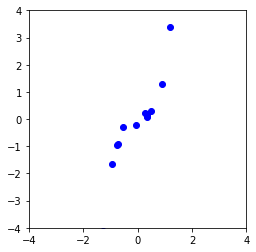

In [3]:
'''
Generate N random points (xi,yi) that satisfy yi = axi^3 + ni, 
where a is scalar value and ni is a small amount of noise.

The values xi should range from [-2,2] 
and the parameter "a" should be drawn from a normal distribution (i.e., randn).

Plot the data points.

'''
import numpy as np
import matplotlib.pyplot as plt

N = 20
max_val, min_val = 2, -2
range_size = (max_val - min_val)

x = np.random.rand(N)* range_size + min_val
a = np.random.randn(1)
y = a* (x * x * x) + 0.1*np.random.randn(N)

'''
# Derive least-squares estimate of the cubic parameter "a" in y = ax^3
m_est = 3 * a * xa
xa = np.arange(-2,2,0.01)

ye = m_est * xa
'''

ax = plt.axes()
ax.set_aspect('equal', adjustable='box')
plt.plot(x,y,'bo')
#plt.plot(xa,ye,'b:')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()
#print(x,y)


In [ ]:
'''
Derive least-square estimate of the cubic parameter "a" in y = ax^3

E(a) = sum_{i=1} ^{n} [ax_i ^ 3 - y_i]^2

dE/da = sum_{i=1} ^{n} 2x_i ^3[ax_i^3 - y_i]
      = sum_{i=1} ^{n} 2a*(x_i^3 * x_i^3) - 2 * (x_i^3 * y_i)
      = a * sum_{i=1} ^{n} 2*(x_i ^ 3 * x_i ^3) - sum_{i=1} ^{n} 2*(x_i^3 * y_i)
      
a * sum_{i=1} ^{n} 2*(x_i ^ 3 * x_i ^3) = sum_{i=1} ^{n} 2*(x_i^3 * y_i)
 
a = sum_{i=1} ^{n} 2 * (x_i ^3 y_i)/sum_{i=1} ^{n} 2*(x_i^3 * y_i)

a = sum_{i=1}^{n} x_i^3 * y_i) / sum_{i=1}^{n} (x_i^3 * x_i^3)


'''



In [4]:
X = x * x * x
#a = sum_{i=1}^{n} x_i^3 * y_i) / sum_{i=1}^{n} (x_i^3 * x_i^3)
a_est = np.sum(X*y) / np.sum(X*X)
print('%.2f' % a, '%.2f' % a_est)

1.95 1.94


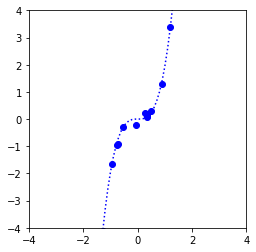

In [7]:
xe = np.arange(-4, 4, 0.1)
ye = a_est*xe*xe*xe #estimated cubic

ax = plt.axes()
ax.set_aspect('equal', adjustable= 'box')
plt.plot(x,y, 'bo')
plt.plot(xe,ye,'b:')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

In [1]:
import numpy as np

def Mat(A, b):
    N, M = A.shape
    u = np.zeros ((N,1))
    for i in range of (N):
        for j in range of (M):
            u[[i]] += A[i][j] * b[j]
            
    return u

SyntaxError: invalid syntax (<ipython-input-1-99e68829b54e>, line 6)